## Objective: Explore the dataset to uncover patterns, identify data quality issues, and form hypotheses that will guide your feature engineering.

Use Jupyter Notebook (notebooks/eda.ipynb) for all exploratory work. This notebook is for exploration only; it is not for production code.

Instructions:

## Overview of the Data:
Understand the structure of the dataset, including the number of rows, columns, and data types.

## Summary Statistics
Understand the central tendency, dispersion, and shape of the dataset’s distribution.
## Distribution of Numerical Features
Visualize the distribution of numerical features to identify patterns, skewness, and potential outliers.
## Distribution of Categorical Features
Analyzing the distribution of categorical features provides insights into the frequency and variability of categories.
## Correlation Analysis
Understanding the relationship between numerical features.
## Identifying Missing Values
Identify missing values to determine missing data and decide on appropriate imputation strategies.
Outlier Detection
Use box plots to identify outliers.

## Data fields

## TransactionId: Unique transaction identifier on the platform
## BatchId: Unique number assigned to a batch of transactions for processing
## AccountId: Unique number identifying the customer on the platform
## SubscriptionId: Unique number identifying the customer subscription
## CustomerId: Unique identifier attached to Account
## CurrencyCode: Country currency
## CountryCode: Numerical geographical code of the country
## ProviderId: Source provider of the Item bought.
## ProductId: Item name being bought.
## ProductCategory: ProductIds are organized into these broader product categories.
## ChannelId: Identifies if the customer used web, Android, IOS, pay later, or checkout.
## Amount: Value of the transaction. Positive for debits from the customer account and negative for credits into the customer account.
## Value: Absolute value of the amount
## TransactionStartTime: Transaction start time
## PricingStrategy: Category of Xente's pricing structure for merchants
## FraudResult: Fraud status of transaction 1 = yes, 0 = No

# Step 1-  Loading data and seeing the first 5 rows

In [1]:
import sys
from pathlib import Path

# Add src to path so we can import our module
PROJECT_ROOT = Path.cwd().parent
sys.path.insert(0, str(PROJECT_ROOT / "src"))

from eda import load_raw_data, overview, plot_numerical_distributions, plot_categorical_distributions, plot_customer_accounts, plot_correlation_matrix, detect_outliers, check_missing_values

data_path = PROJECT_ROOT / "data" / "raw" / "data.csv"
print(f"Loading data from: {data_path}")

df = load_raw_data(data_path)
df.head()



Loading data from: c:\Users\yeget\-End-To-End-Credit-Risk-Probability-Model-\data\raw\data.csv


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


# Step 1- Overview of the data 
## Understand the structure of the dataset, including the number of rows, columns, and data types.

In [2]:
ov = overview(df)
print(f"Rows: {ov['n_rows']}, Columns: {ov['n_cols']}")
print('\nColumns:')
print(ov['columns'])
print('\nDtypes:')
for k,v in ov['dtypes'].items():
    print(f"  {k}: {v}")
print(ov['info'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

## From the overview of the data we can see that we have 16 columns and 95662, rows
## We can see that none of the rows have missing values altough a deep dive is required to confirm this
##  We can see the data types of each column to help us in our analysis. Most are of type object so we need to convert them to the right data types for analysis. 
##  `TransactionStartTime` is currently an `object` (string) and must be converted to `datetime`.
##  `FraudResult` and `PricingStrategy` are integers but act as categorical/flags.

# Step 2- Summary Statistics
## Understand the central tendency, dispersion, and shape of the dataset’s distribution.

In [3]:
print(ov['describe'])

       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


## Interpretation of summary statistics
 CountryCode
 CountryCode is constant (256) — drop it; no predictive value.

## Value (absolute)

Count = 95,662
Median = 1,000; 75% = 5,000
Mean ≈ 9,900 with a very large std → heavy right tail and extreme outliers (max ≈ 9.88M)
Most transactions are small; a few very large transactions inflate the mean.
Recommendation: use log-transform or robust scaling for Value.

## Amount (signed)
Median = 1,000; mean ≈ 6,717; min = -1,000,000; max = 9,880,000
Both credits (negative) and debits (positive) exist with large extremes.
Many small transactions and a few very large ones drive sums and std.
Credit vs Debit analysis needed
Compute counts and total monetary volume for negative Amounts (credits/refunds) and positive Amounts (debits/payments) to understand directionality.

## Actionable features to create

Total debit volume per account
Total credit volume per account
Counts of credits and debits, fraction of credits
Max debit and max credit per account
Log(Value) and robust-scaled Amount (or handle sign separately)

# Distribution of Numerical Features
Visualize the distribution of numerical features to identify patterns, skewness, and potential outliers.

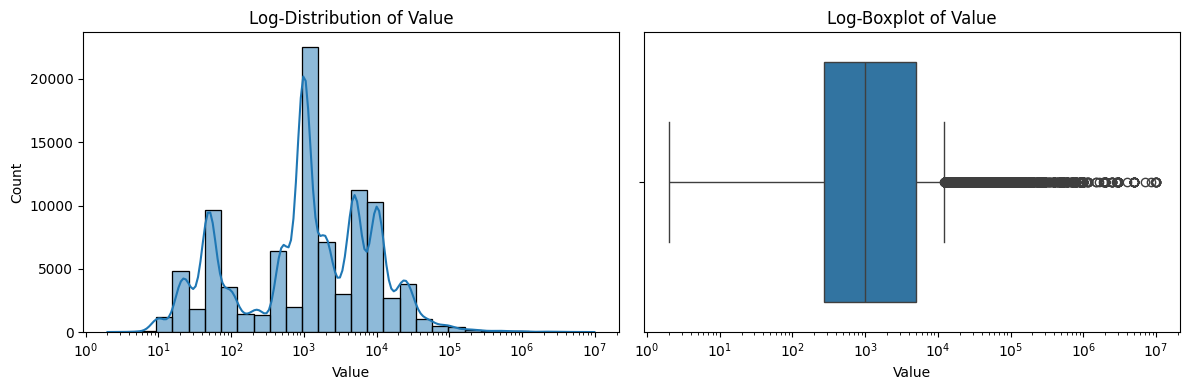

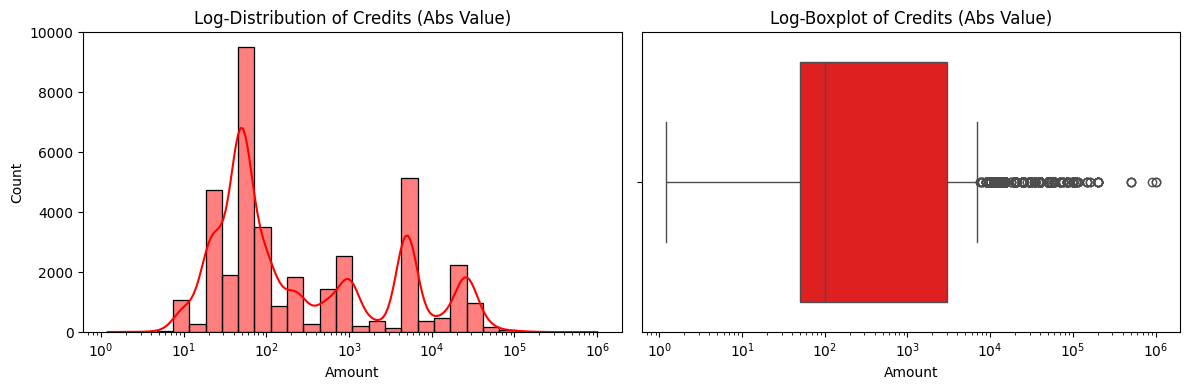

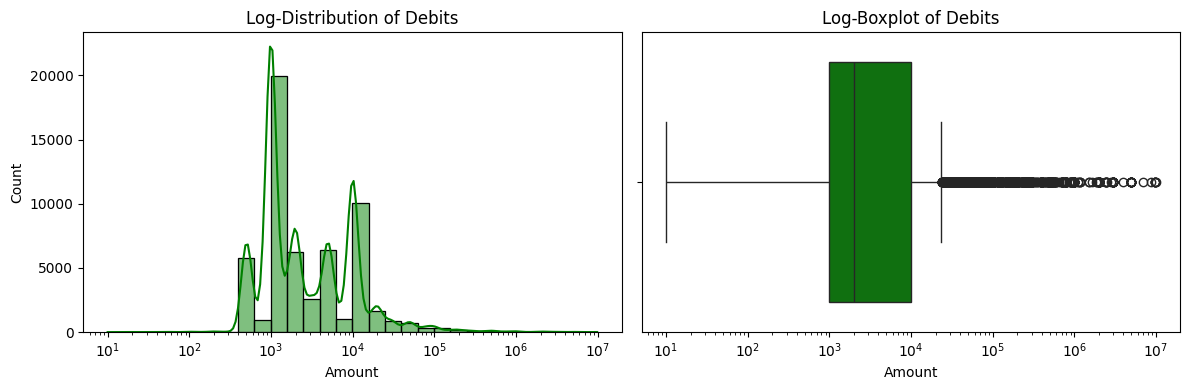

In [4]:
from eda import plot_numerical_distributions
plot_numerical_distributions(df)

# Interpretation of  Numerical Features Distribution
Dominance of Micro-Transactions:

The vast majority of transaction volume consists of very small amounts (likely airtime top-ups or small data bundles).
Business Insight: The platform is primarily a high-frequency, low-value utility tool for most users. Revenue strategy should focus on volume rather than high margins per transaction.
Distinct User Segments (Multi-Modal Distribution):

The data shows clear "bumps" or clusters of activity rather than a smooth curve.
Tier 1 (~50 - 500 UGX): Casual users (Airtime/Fees).
Tier 2 (~1,000 - 5,000 UGX): Standard users (P2P transfers/Bill payments).
Tier 3 (~10,000+ UGX): Power users or Business accounts.
Action: We can create a UserTier feature to treat these groups differently in the risk model.
Credits vs. Debits Behavior:

Credits (Negative Amounts): Show sharp spikes at specific values. This implies standardized inflows, such as automated refunds, rewards, or specific loan disbursements.
Debits (Positive Amounts): Show a smoother, wider variance. This reflects organic, varied customer spending behavior.
High-Value "Whales" (Outliers):

Even on a compressed scale, there is a long tail of extreme high-value transactions.
Risk Insight: These outliers represent a mix of VIP customers (high revenue) and potential fraud/money laundering risks. They
cannot be treated as "average" users and require a dedicated risk threshold.

## Distribution of Categorical Features
Analyzing the distribution of categorical features provides insights into the frequency and variability of categories.



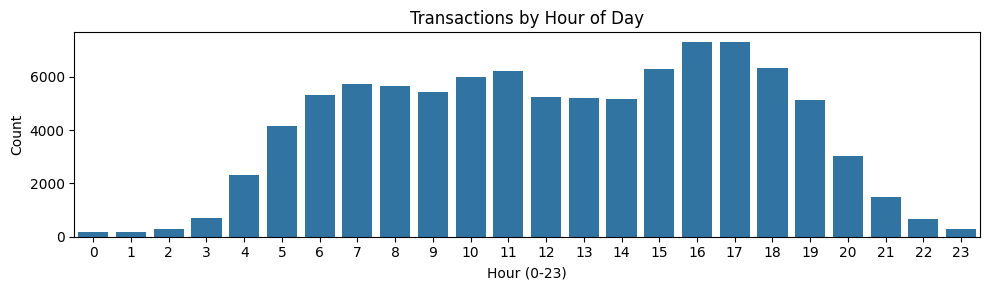

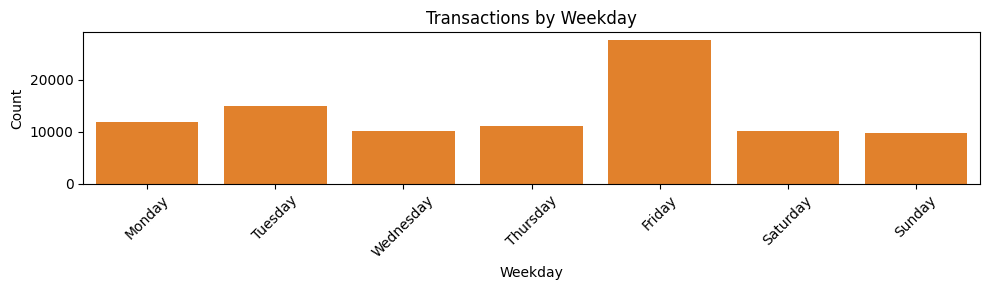

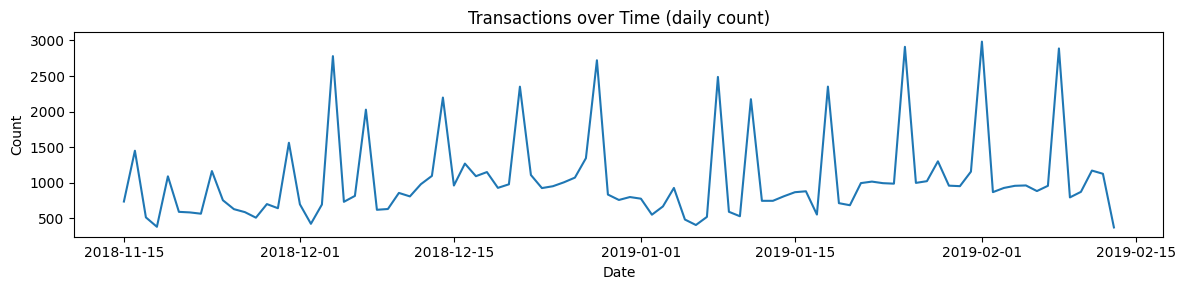

High cardinality for AccountId (3633 unique values) — showing top 10 categories.


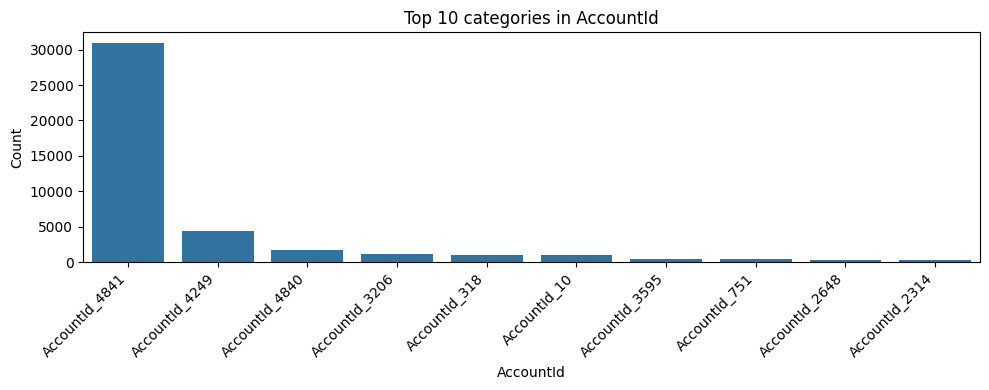

High cardinality for CustomerId (3742 unique values) — showing top 10 categories.


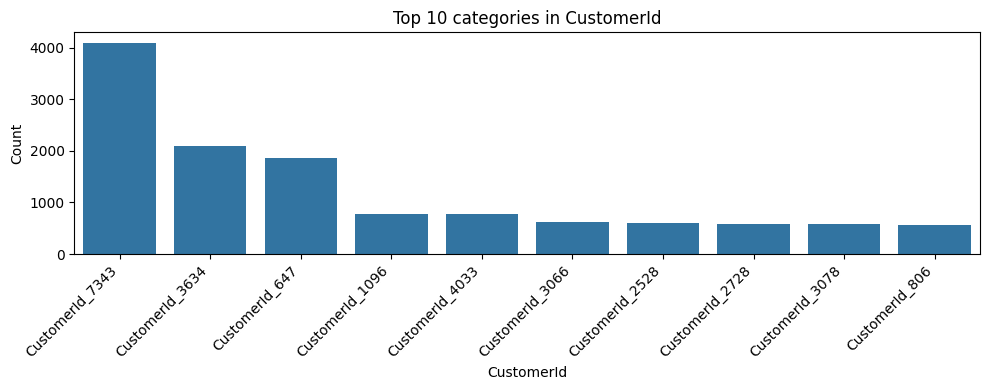

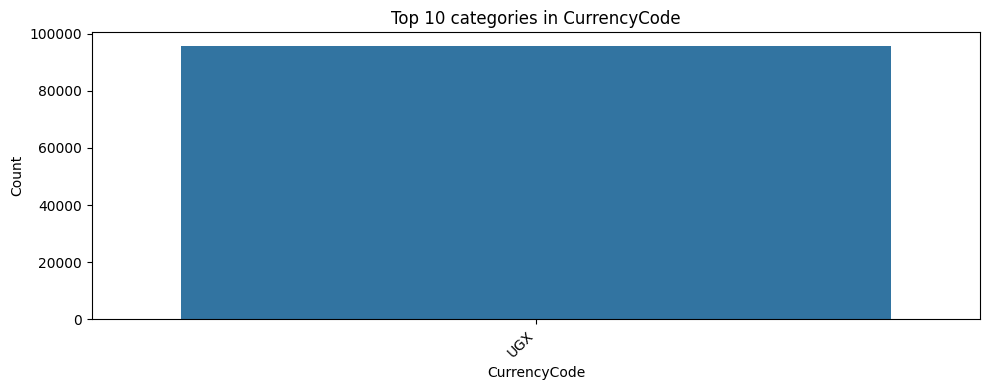

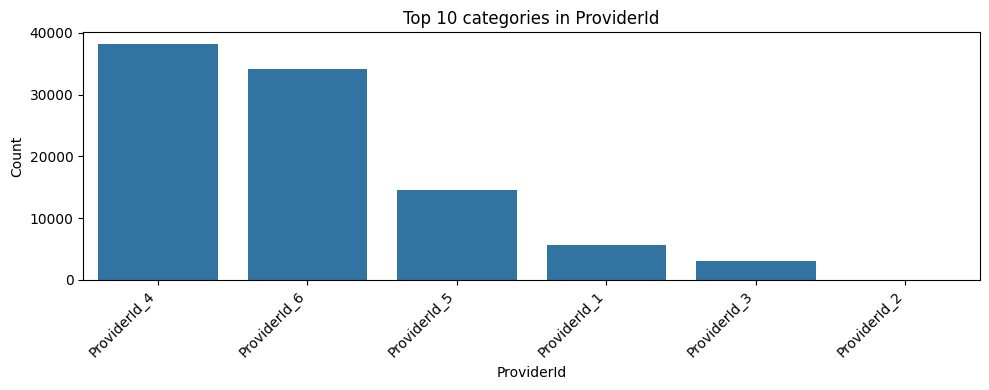

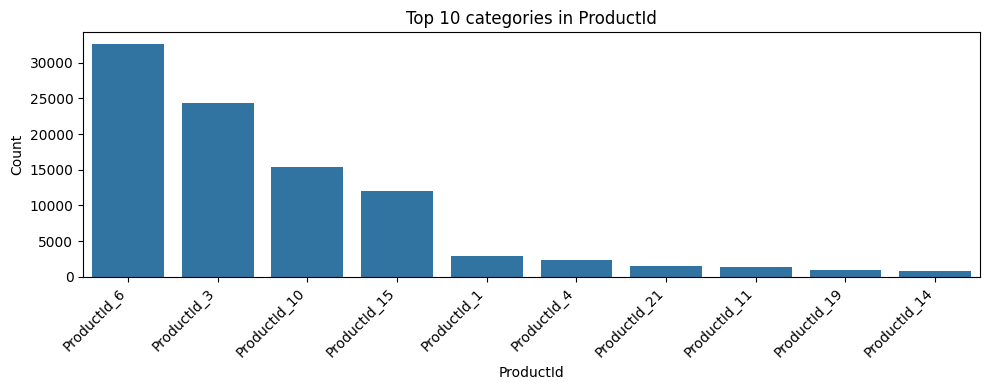

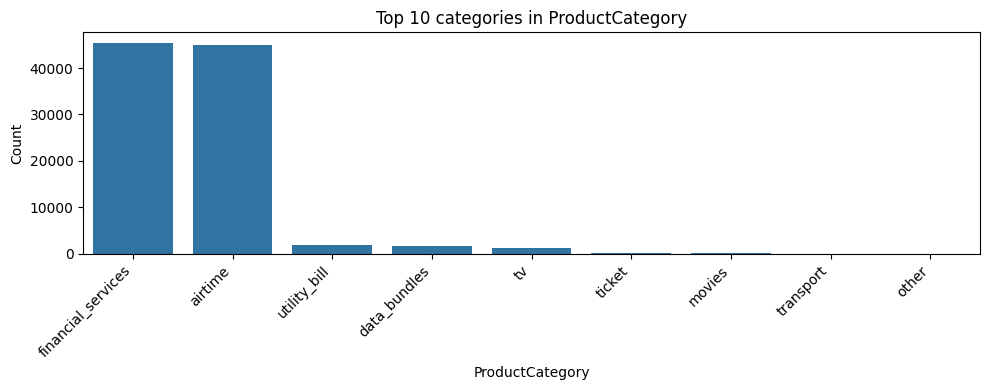

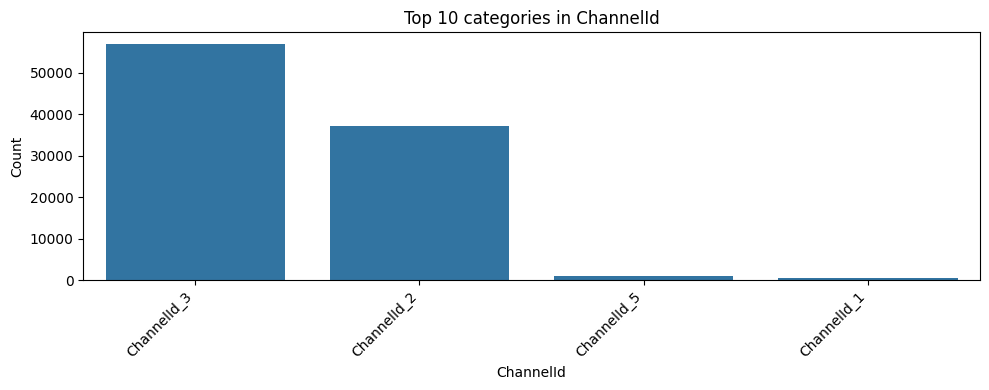

High cardinality for TransactionStartTime (94556 unique values) — showing top 10 categories.


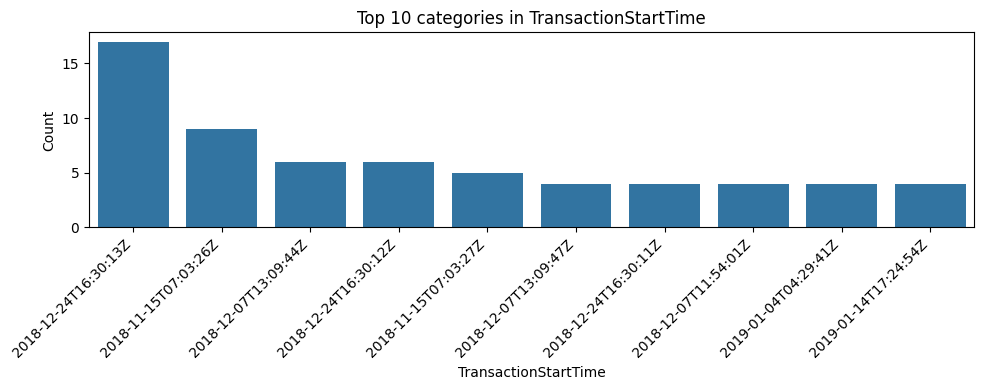

In [5]:
from eda import plot_categorical_distributions
plot_categorical_distributions(df)

**Observation**:
- **Product Categories**: The top 2 categories (`financial_services`, `airtime`) account for ~95% of volume. Categories like `transport`, `other` are negligible and can be grouped.
- **Provider Dominance**: `ProviderId_4` is the largest provider. Provider-specific risk might be a useful feature.
- **Channel Usage**: `ChannelId_1` (web) dominates usage. Mobile channels are underutilized, which may reflect user demographics or access issues.
-  **Product  id ** : `product id 6` is the most popular product by far, followed by `product id 10` and `product id 3`. Less popular products could be grouped into an "Other" category to reduce dimensionality.
- ** Customer domimance** - `customer id 7343 and account id 4841` is the most frequent customer and account respectively, indicating a potential power user or business account that may need separate risk profiling. Account id and customer id need to be further investigated for their high frequency together - linking a customer to an account.


Top customers (by transaction count):
CustomerId
CustomerId_7343    4091
CustomerId_3634    2085
CustomerId_647     1869
CustomerId_1096     784
CustomerId_4033     778
Name: count, dtype: int64

Showing accounts for customer: CustomerId_7343


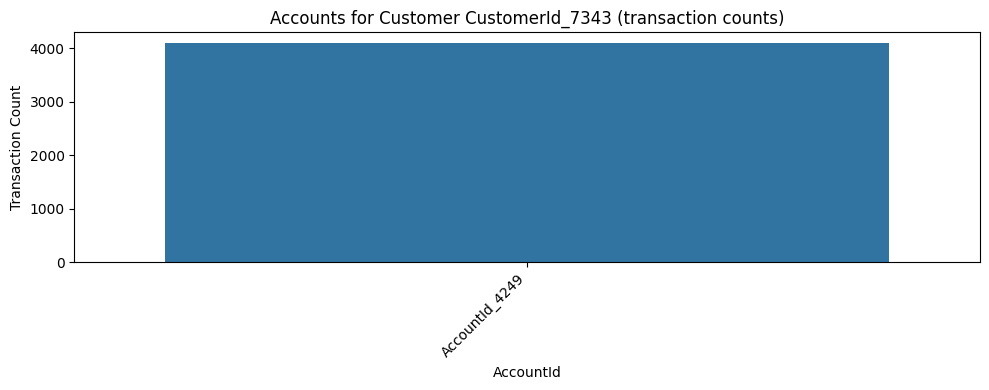

Found 1 accounts for CustomerId=CustomerId_7343

--- Account: AccountId_4249 (n=4091) ---
       TransactionId      AccountId ProductCategory   Amount  Value TransactionStartTime
 TransactionId_10605 AccountId_4249         airtime -30000.0  30000 2018-11-16T12:55:29Z
 TransactionId_95107 AccountId_4249         airtime -30000.0  30000 2018-11-16T12:55:33Z
 TransactionId_26944 AccountId_4249         airtime -50000.0  50000 2018-11-16T12:55:37Z
TransactionId_121004 AccountId_4249         airtime -50000.0  50000 2018-11-16T12:55:41Z
TransactionId_124065 AccountId_4249         airtime -60000.0  60000 2018-11-16T12:55:45Z


In [6]:
from eda import plot_customer_accounts

# Inspect top customers and visualize accounts for the most frequent one
top_customers = df['CustomerId'].value_counts().head(5)
print("Top customers (by transaction count):")
print(top_customers)

if not top_customers.empty:
    customer = top_customers.index[0]
    print(f"\nShowing accounts for customer: {customer}")
    plot_customer_accounts(df, customer, sample_per_account=5)
else:
    print("No customers found in dataset.")

# Correlation Analysis
Understanding the relationship between numerical features.

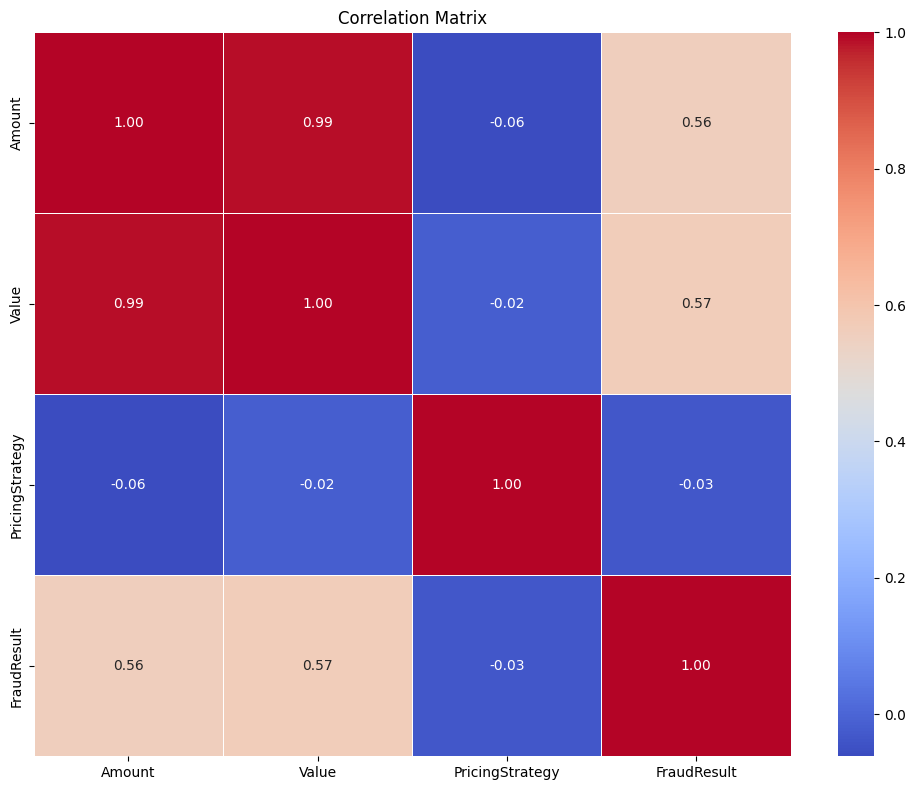

In [7]:
plot_correlation_matrix(df)

# Outlier Detection
Identify outliers in numerical features using IQR method.
We analyze `Value` (absolute amount) and `Amount` (signed) separately to distinguish between high-value debits and credits.

In [8]:
detect_outliers(df)

--- Outlier Detection (IQR Method) ---

[Value] (Absolute Amount)
Outliers detected: 9021 (9.43%)
IQR Bounds: [-6812.50, 12087.50]
Top 5 highest outliers:
       TransactionId   Value    ProductCategory
 TransactionId_31461 9880000 financial_services
 TransactionId_27985 9870000 financial_services
 TransactionId_15293 9860888 financial_services
 TransactionId_55014 9856000 financial_services
TransactionId_137519 9850000 financial_services

[Amount] (Signed - Split Analysis)
Debit Outliers (High Positive): 2775 (4.83% of debits)
Upper Bound: > 23500.00
Credit Outliers (High Negative): 4284 (11.22% of credits)
Lower Bound: < -7425.00


# Missing Values Analysis
Identify missing values to determine missing data and decide on appropriate imputation strategies.

In [9]:
check_missing_values(df)

--- Missing Values Analysis ---
No missing values found in the dataset.


# Top Insights & Business Implications
Based on the EDA and the project objective ("End-to-End Credit Risk Probability Model"), here are the key takeaways:

### 1. Viability of RFM for Proxy Target Definition
*   **Insight:** The `Value` distribution is heavily right-skewed (Median 1,000 UGX vs. Mean ~9,900 UGX), with a massive dominance of micro-transactions (likely Airtime).
*   **Business Impact:** This confirms the strategy in the `README` to use **RFM (Recency, Frequency, Monetary) clustering** to define a proxy target. The natural separation between "casual" users (low value/freq) and "power" users allows us to label the "least engaged" cluster as high-risk (`ishighrisk=1`) for the supervised training phase.

### 2. Segmentation is Critical for Model Performance
*   **Insight:** `ProductCategory` is dominated by `financial_services` and `airtime` (~95%). The behavior of a user buying 500 UGX airtime is vastly different from one moving 1M UGX in financial services.
*   **Business Impact:** A "one-size-fits-all" model might underperform. We should consider:
    *   **Feature Engineering:** Interaction terms like `ProductCategory * Amount`.
    *   **Model Strategy:** Potentially training separate scorecards (or using the Gradient Boosting model mentioned in the README) to capture these distinct non-linear risk profiles.

### 3. Outlier Management for "PD-Like" Scoring
*   **Insight:** Significant outliers exist in `Amount` and `Value`.
*   **Business Impact:** For the **Logistic Regression (WoE)** model mentioned in the README (favored for interpretability/Basel II), these outliers must be capped or log-transformed. Raw values would distort the coefficients. Additionally, distinguishing between **Credits** (inflows/refunds) and **Debits** (outflows) is vital—consistent inflows should improve a customer's credit score (lower PD).

### 4. Entity Resolution for Credit Limits
*   **Insight:** The discrepancy between top `CustomerId` and `AccountId` counts suggests users operate multiple accounts.
*   **Business Impact:** Risk probability (PD) and Exposure (EAD) must be calculated at the **CustomerId** level, not the AccountId level. If we score by Account, a risky customer could bypass limits by opening new accounts. The feature engineering pipeline (`src/dataprocessing.py`) must aggregate transactions by `CustomerId` before scoring.

### 5. Channel Bias & Deployment Risk
*   **Insight:** `ChannelId_1` (Web) dominates the dataset.
*   **Business Impact:** If the future "Buy-Now-Pay-Later" product targets mobile users (Android/iOS), this historical web-heavy data might introduce bias.
*   **Action:** As per the README's "MLflow-tracked experiments," we must monitor for **Data Drift** in `ChannelId` post-deployment to ensure the model remains valid if the user base shifts to mobile.